# Data & Apprentissage, M2CHPS 2022

## 5th Lab Session

**Instructor:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).  
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse-2022.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse-2022.html)

The most updated version of this file can be found at instructor's webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Lab#.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Lab#.ipynb),
where '#' should be replaced by the number of the lab session. These notebooks are self-contained and hence have all the needed links to other resources.

Part of the scikit-learn material comes from its [online documentations and tutorial](https://scikit-learn.org/stable/modules/linear_model.html).


## Table of Contents

1. <a href="#1.-Regression-tree">Regression tree</a>
2. <a href="#2.-Support-Vector-Regression">Support Vector Regression</a>
3. <a href="#3.-Ensemble-models">Ensemble models</a>
4. <a href="#4.-Anomaly-detection---Outlier-detection---Novelty-detection">Anomaly detection - Outlier detection - Novelty detection</a>

## 1. [Regression tree](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

What we've seen so far was the standard decision tree for classification. In that, each leaf decides to which class an unkown object belongs. Instead of this discrete decisions, in the regression case, each leaf decides about the continuous value of the regressed function. This is achieved by training a different *local* regressor for the objects inside each leaf. The answer of the model is the average response of the objects in the leaf. 

In principle, each leaf should contain data objects that can be well-regressed by the local regressors, in the sense that their distance to the mean of the training data in the leaf is small. 

The training follows a top-down, greedy approach known as *recursive binary splitting*. It starts at the top of the tree where all observations fall into a single region (hence we need one regressor) and successively splits the predictor space into two new branches. It is greedy because, at each step, it chooses the best split at that particular region and not for the next steps.

**1D Example**

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

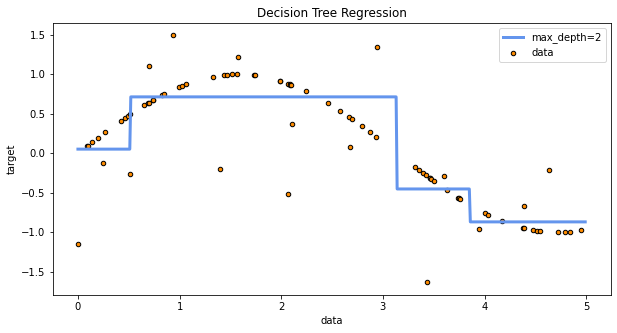

In [5]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit two regression models (with different tree depth)
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Collect the predictions for the two models
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,5))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

**Show regression tree with max depth = 2**

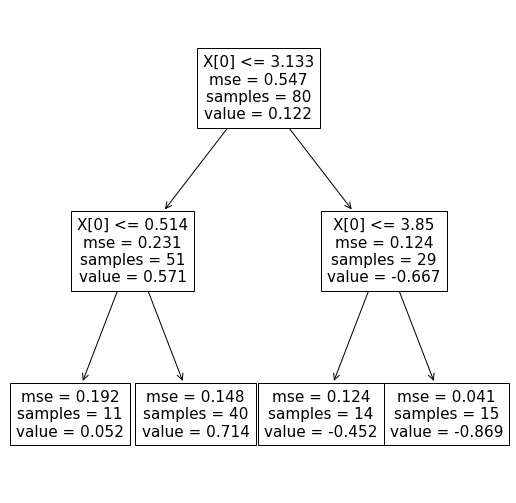

In [6]:
plt.figure(figsize=(9,9))
tree.plot_tree(regr_1)
plt.show()

**Compare with a tree of higher depth (longer branches)**

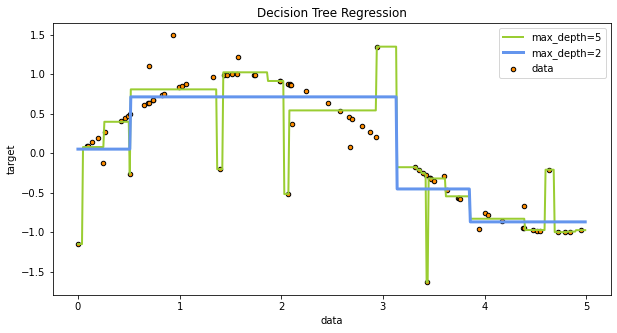

In [7]:
# Plot the results
plt.figure(figsize=(10,5))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

**Show regression tree with max depth = 5**

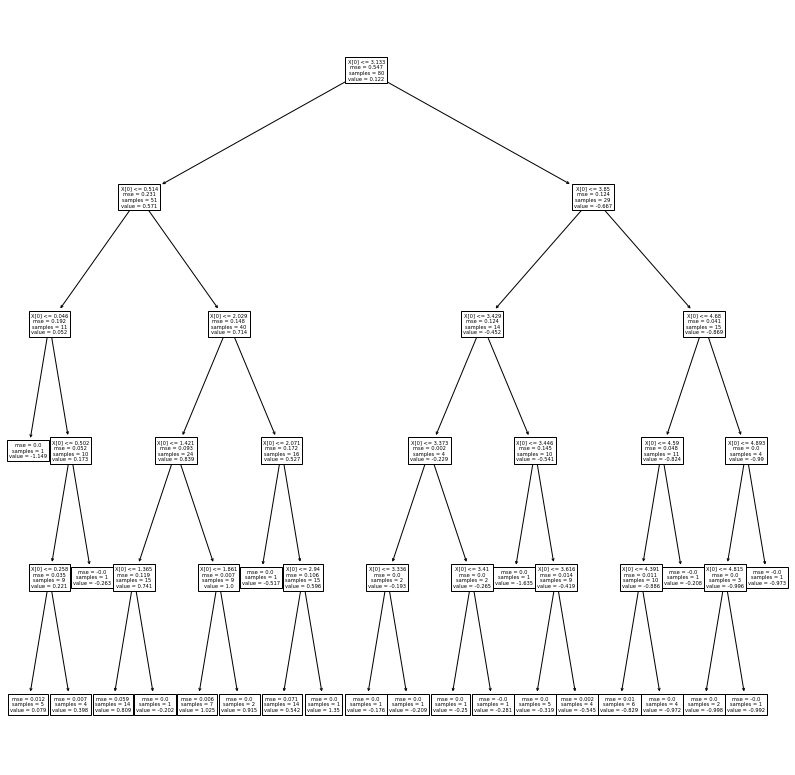

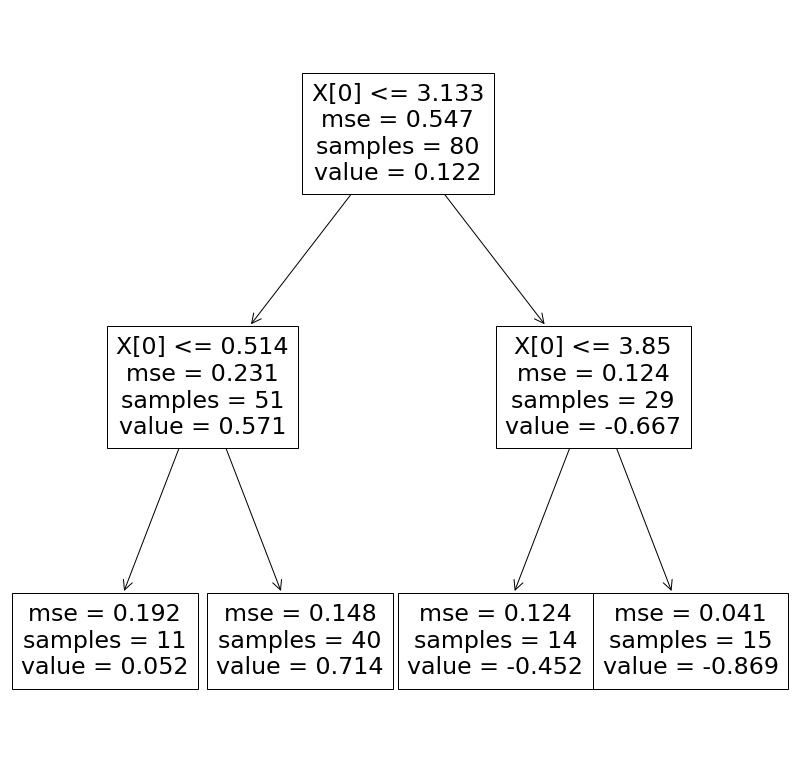

In [8]:
plt.figure(figsize=(14,14))
tree.plot_tree(regr_2)
plt.show()

## 2. Support Vector Regression

Following the concept of the original Support Vector Machines (SVM), a Support Vector Regressor (SVR) can perform regression by minimizing (instead of maximizing as SVM) the *margin* of data around the estimated function. A distance threshold $\epsilon$ is used to ignore in the minimization the data that are very close to the estimated function.  

Linear or non-linear kernels can be used, as in SVM. A [toy example of 1D regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) using linear, polynomial and RBF kernels follows.

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=2, epsilon=.1, coef0=1)

# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

**Try out yourself:** Play with the $\epsilon$ parameter and see the results of the different kernels.  

## 3. Ensemble models

**Ensemble learning** is a machine learning approach that is based on the idea that: multiple weak models (with not particularly good, but just *sufficient* performance) can be used to synthesize a decision our of their individual decisions, and achieve better performance than a single very well-performing model on its own. 

One of the most critical things to design is a mechanism that would feed each of the individual weak models with some *variation* of the problem so that they develop their own perspective to it. This variation can be generally produced at any of the levels of:  
* a) the learning model (e.g. using different models or algorithms to train them), 
* b) the hyperparameter selection (e.g. using different parametrizations for the weak models),  
* c) the data to train with (e.g. subsampling, perturbation, etc).

In terms of architecture we can mention the following very well-known general ones:
* **Stacking**: A single training dataset is given to multiple models that are trained using $k$-fold validation. Here each model indicates a different algorithm used.
* **Bagging**:  $n$ samples of the training data are generated by selecting uniformly at random (equal weights) data items from the training data with replacement. Each model learns independently (that could be in parallel). Contrary to stacking, here each model uses the same algorithm.
* **Boosting**: The basic thing introduced is that the number of models in the ensemble are trained incrementally. The procedure starts with equal weights for all training objects and a sampling that feeds the learning of one model. Then, each object is reweighted according to whether there is high confidence that *it has been learned* by the model(s) so far trained. More specifically, higher weights (and chance to get sampled) get the objects for which the ensemble has not yet a good performance.

A **Random Forest** of decision (or regression) trees is a typical example of ensemble model and there are ways to be constructed using any of the above architectures.  

**Exercise:** Can you describe and develop an SVM Ensemble? (this is also described at the end of this notebook).

### 2.2. [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py)

The ``RandomForestClassifier`` is trained using *bootstrap aggregation*, where
each new tree is fit from a bootstrap sample of the training observations
`z_i = (x_i, y_i)`. The *out-of-bag* (OOB) error is the average error for
each `z_i` calculated using predictions from the trees that do not
contain `z_i` in their respective bootstrap sample. This allows the
``RandomForestClassifier`` to be fit and validated whilst being trained \*.

The example below demonstrates how the OOB error can be measured at the
addition of each new tree during training. The resulting plot allows a
practitioner to approximate a suitable value of ``n_estimators`` at which the
error stabilizes.

\* T. Hastie, R. Tibshirani and J. Friedman, "Elements of Statistical Learning Ed. 2", p592-593, Springer, 2009.


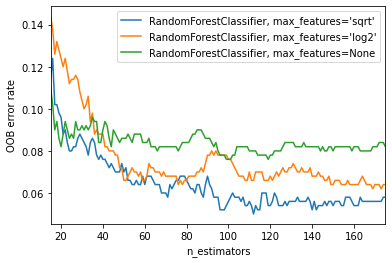

In [2]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
# Also "max_features" is the number of features to consider for spliting a node further.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

## 4. Anomaly detection - Outlier detection - Novelty detection

The interest of many applications lies around the question whether data objects are:
* **inliers**: which means 'regular' / 'normal' / 'not far from what was expected', or 
* **outliers**: which means 'irregular' / 'abnormal' / 'quite far from what was expected'. 

The generic concepts become more explicit after specifying the model that we want to use for this purpose. For example if the model is a probability distribution function (pdf), then an outlier is a data object that cannot be *sufficiently* explained because -let's say- it has a very low *likelihood* of having being generated by that pdf.

A type of application has to do with *data cleaning*. Another one has to do with *detecting anomalies* e.g. in monitored systems, or *event detection* in certain streams of data (e.g. video surveilance). In some cases there is no assumed noise that could have generated the outliers; in that case the non-typical data objects represent *novel instances* and the task is reffered to as *novelty detection*.

Although the concepts may sound ambiguous and blurry (it's true that algorithms developed for one of the tasks can be also tried in the rest), there are some things to consider. 
* The first is that all the concepts: outliers, novelties, anomalies, are supposed to be the minority in a dataset. 
* The concept of outliers generally expects no concentration of them at some point with high-density. They are supposed to be arbitrary non-regular points.
* The concepts of anomalies or novelties, however, may very well include 'irregular' data points that in some sense can form clusters (shapes in the space). Imagine for example a new product/idea/innovation that starts as a single point far from the existing others, but after a while more points emerge closeby (refinement/improvement/extension of the first product/idea/...).

### 4.1. [Anomaly/outlier detection with One-class SVM (RBF-kernel)](https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py)

One-class SVM is an unsupervised algorithm that learns a decision function by classifying new data as either *similar* or *different* to the data seen, i.e. the training set.

An example follows with a synthetic toy dataset with two dense areas.

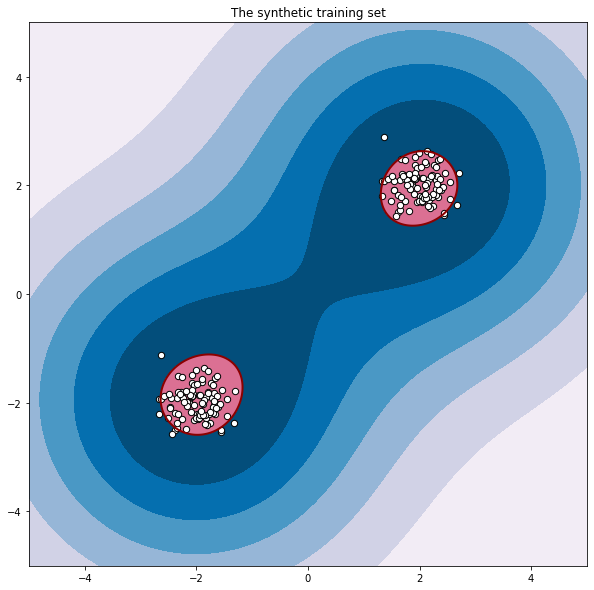

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

plt.figure(figsize=(10,10))
plt.title("The synthetic training set")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')


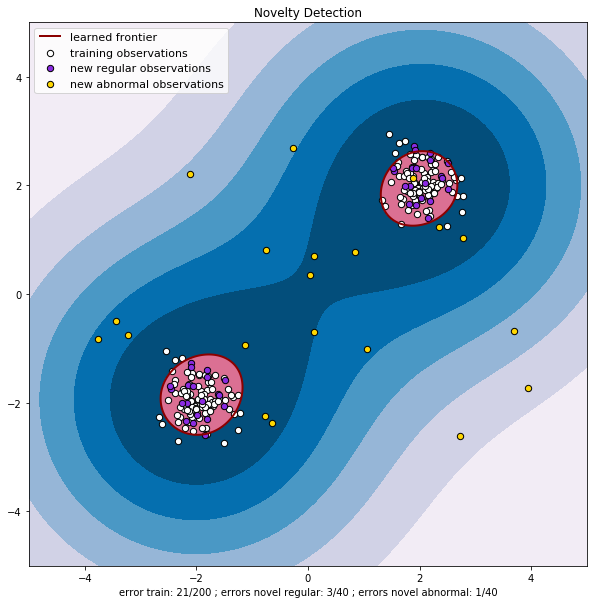

In [56]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel("error train: %d/200 ; errors novel regular: %d/40 ; "
           "errors novel abnormal: %d/40"
           % (n_error_train, n_error_test, n_error_outliers))
plt.show()

### 4.2. Isolation Forest

Since recursive partitioning can be represented by a tree structure, the number of splits required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality of our decision function.

Random partitioning produces noticeable shorter paths for anomalies (in particular, leafs with very few objects!). Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

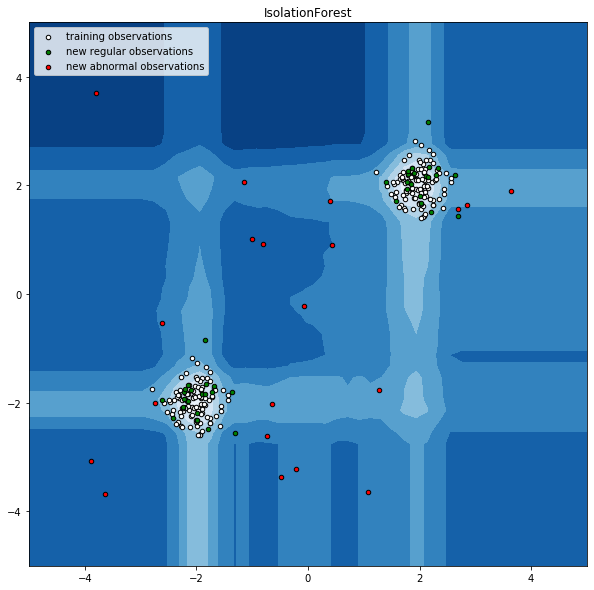

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

### 4.3. [Outlier detection with Local Outlier Factor (LOF)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)

The [Local Outlier Factor (LOF)](https://en.wikipedia.org/wiki/Local_outlier_factor) algorithm is an unsupervised anomaly detection method which computes the *local density deviation* of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

The number of neighbors considered (parameter ``n_neighbors``) is typically set 
* 1) greater than the minimum number of samples that a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 
* 2) smaller than the maximum number of samples that can potentially be local outliers. 

**Note:** In practice, such informations are generally not available, and taking ``n_neighbors=20`` work well as a general rule of thumb.

LOF computes an index that roughly means:
* ``LOF(k) ~ 1`` indicates similar density as neighbors.
* ``LOF(k) < 1`` indicates higher density than neighbors (inlier).
* ``LOF(k) > 1`` indicates lower density than neighbors (outlier).

Hence, the bigger the LOF index, the more evident a point seems an outlier.

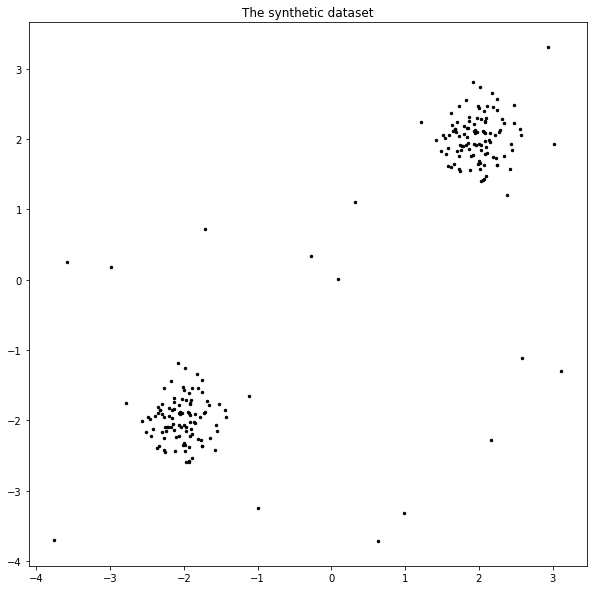

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate training data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# Show the generated dataset
plt.figure(figsize=(10,10))
plt.title("The synthetic dataset")
plt.scatter(X[:, 0], X[:, 1], color='k', s=6.)
plt.show()

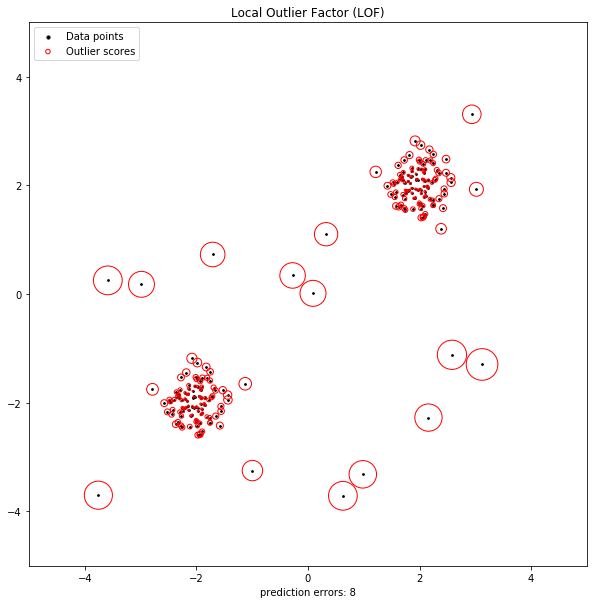

In [65]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

# plot data points
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### 4.4. [Comparative demonstration of anomaly detection algorithms for outlier detection](https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html#sphx-glr-auto-examples-plot-anomaly-comparison-py)

This example shows characteristics of different anomaly detection algorithms on 2D datasets. Datasets contain one or two modes (regions of high density) to illustrate the ability of algorithms to cope with multimodal data.

For each dataset, 15% of samples are generated as random uniform noise. This proportion is the value given to the nu parameter of the ``OneClassSVM`` and the contamination parameter of the other outlier detection algorithms. Decision boundaries between inliers and outliers are displayed in black except for Local Outlier Factor (LOF) as it has no predict method to be applied on new data when it is used for outlier detection.

The ``sklearn.svm.OneClassSVM`` is known to be sensitive to outliers and thus does not perform very well for outlier detection. This estimator is best suited for novelty detection when the training set is not contaminated by outliers. That said, outlier detection in high-dimension, or without any assumptions on the distribution of the inlying data is very challenging, and a One-class SVM might give useful results in these situations depending on the value of its hyperparameters.

``sklearn.covariance.EllipticEnvelope`` assumes the data is Gaussian and learns an ellipse. It thus degrades when the data is not unimodal. Notice however that this estimator is robust to outliers.

``sklearn.ensemble.IsolationForest`` and ``sklearn.neighbors.LocalOutlierFactor`` seem to perform reasonably well for multi-modal data sets. The advantage of ``sklearn.neighbors.LocalOutlierFactor`` over the other estimators is shown for the third data set, where the two modes have different densities. This advantage is explained by the local aspect of LOF, meaning that it only compares the score of abnormality of one sample with the scores of its neighbors.

Finally, for the last data set, it is hard to say that one sample is more abnormal than another sample as they are uniformly distributed in a hypercube. Except for the ``sklearn.svm.OneClassSVM`` which overfits a little, all estimators present decent solutions for this situation. In such a case, it would be wise to look more closely at the scores of abnormality of the samples as a good estimator should assign similar scores to all the samples.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

Finally, note that parameters of the models have been here handpicked but that in practice they need to be adjusted. In the absence of labelled data, the problem is completely unsupervised so model selection can be a challenge.

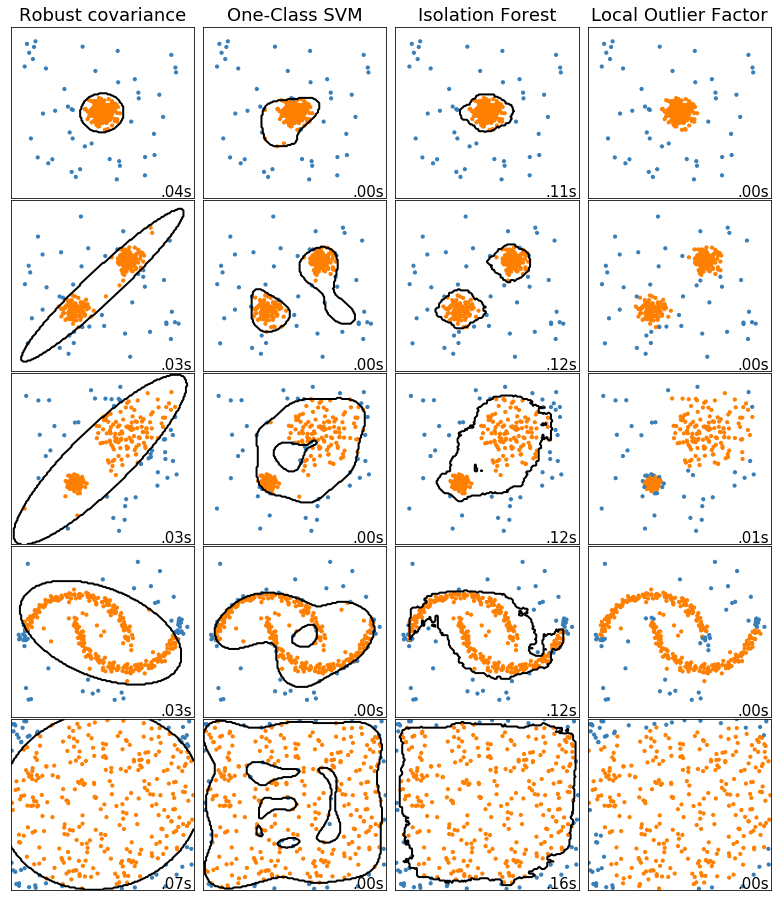

In [72]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3], **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()